In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import the library we need

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

There are two ways to build a neural network.

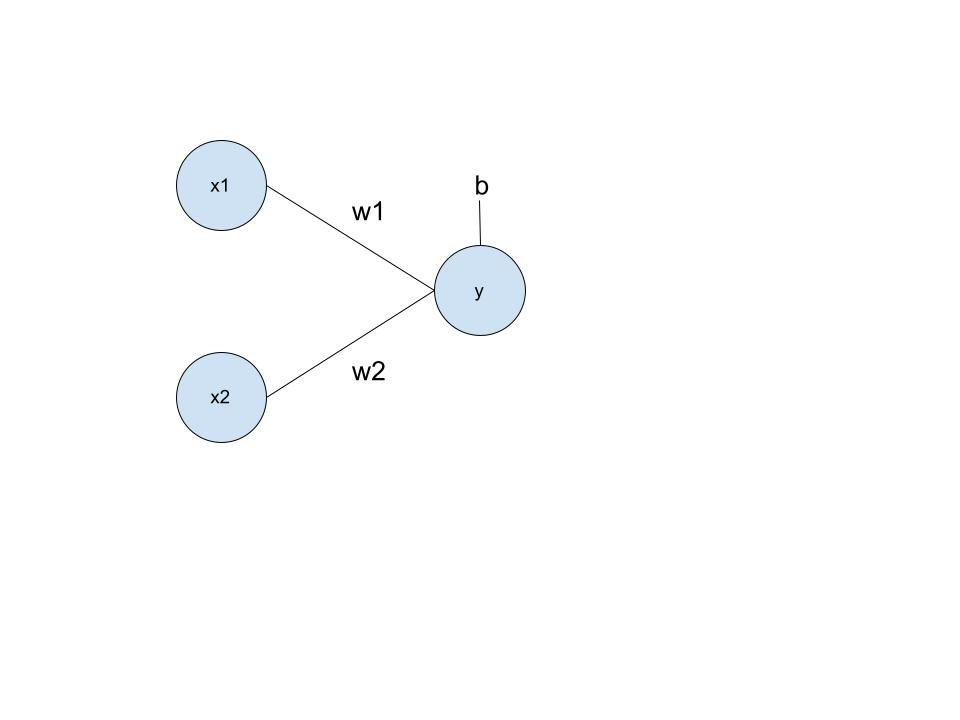

In [ ]:
model_1 = Sequential([
    Dense(1, input_dim=2)])

In [ ]:
model_2 = Sequential()
model_2.add(Dense(1, input_dim=2))

We can see from the .summary() that there is no difference between these two ways.

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


##Loss function (error between the true values and the predict values)

1. Regression problem

In [ ]:
#assume we have y_true and y_predict
y_true = np.array([1,2,3,4])
y_predict = np.array([0,1,2,4])

in this case we use the loss: mean squared error (MSE).

In [ ]:
def mse(y_true, y_predict):
  loss = np.mean(np.square(y_true - y_predict))
  return loss

In [ ]:
loss = mse(y_true, y_predict)
print(loss)

0.75


2. Binary classification problem

In [ ]:
#assume we have y_true and y_predict
y_true = np.array([1,1,0,0])
y_predict = np.array([0.9,0.7,0.1,0.4])

in this case we use binary cross entropy

In [ ]:
def binary_ce(y_true, y_predict):
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))
  return loss

In [ ]:
loss = binary_ce(y_true, y_predict)
print(loss)

0.2695553997550939


let's see what will happen in four extreme cases.

In [ ]:
y_true = np.array([1])
y_predict = np.array([0])
loss = binary_ce(y_true, y_predict)
print(loss)

inf


<ipython-input-122-3e42889cd178>:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))


In [ ]:
y_true = np.array([1])
y_predict = np.array([0.9999999999])
loss = binary_ce(y_true, y_predict)
print(loss)

1.000000082790371e-10


In [ ]:
y_true = np.array([0])
y_predict = np.array([1])
loss = binary_ce(y_true, y_predict)
print(loss)

inf


<ipython-input-122-3e42889cd178>:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_true * np.log(y_predict) + (1 - y_true) * np.log(1 - y_predict))


In [ ]:
y_true = np.array([0])
y_predict = np.array([0.0000000001])
loss = binary_ce(y_true, y_predict)
print(loss)

1.000000082790371e-10


##Train a network(brief)

In [ ]:
X = np.concatenate([np.random.rand(50, 2) * 0.2, np.random.rand(50, 2) * 0.2 + 0.8])
Y = np.concatenate([np.zeros(50), np.ones(50)])

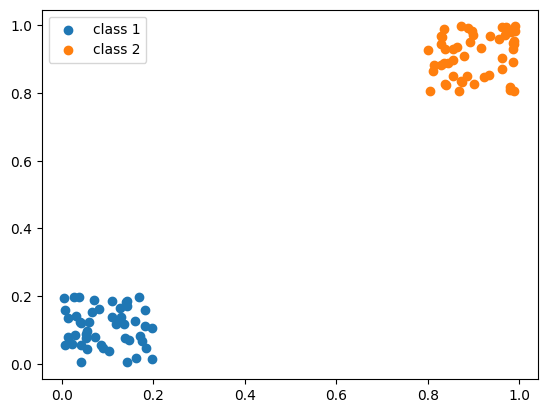

In [ ]:
plt.scatter(X[0:50,0],X[0:50,1],label='class 1')
plt.scatter(X[50:100,0],X[50:100,1],label='class 2')
plt.legend()
plt.show()

In [ ]:
model_example = Sequential([
    Dense(1,input_dim=2, activation='sigmoid')  #we will talk about this activation later
])

model_example.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_example.fit(X, Y, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 0.4893 - accuracy: 0.5000
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4883 - accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.5000
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4862 - accuracy: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.5000
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4842 - accuracy: 0.5000
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.5000
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.5000
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.5000
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4801 - accuracy: 0.5000
Epoch 11/200
4/4 [===========

In [ ]:
weights=model_example.get_weights()

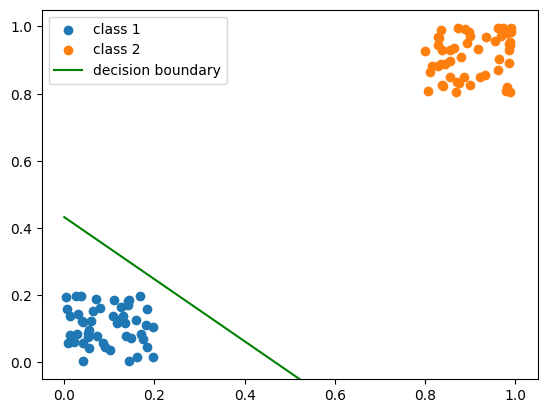

In [ ]:
plt.scatter(X[0:50,0],X[0:50,1],label='class 1')
plt.scatter(X[50:100,0],X[50:100,1],label='class 2')

x1 = np.linspace(0,1,10)
x2 = -(weights[0][0]*x1 + weights[1])/weights[0][1]

#weights[0][0]*x + weights[0][1]*x2 + weights[1]=0


plt.plot(x1,x2,color='green',label='decision boundary')


plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.legend()
plt.show()

##Activation function

Why we add activation function?

-- To solve the non-linear problem

This first comes up when trying to solve the XOR problem

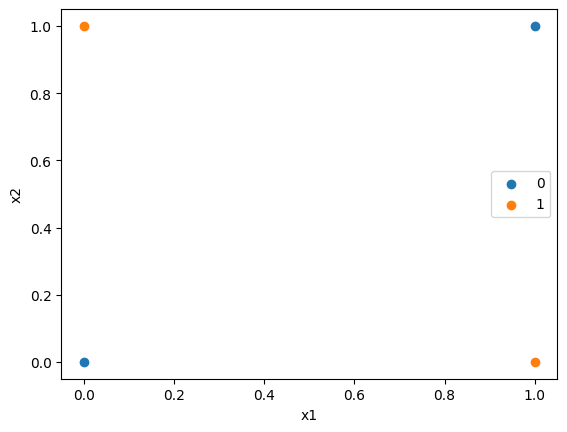

In [ ]:
x = [0,1]
y1 = [0,1]
y2 = [1,0]
plt.scatter(x,y1,label='0')
plt.scatter(x,y2,label='1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

common activation functions:

Sigmoid function

In [ ]:
def sigmoid(x):
  y = 1/(1 + np.exp(-x))
  return y

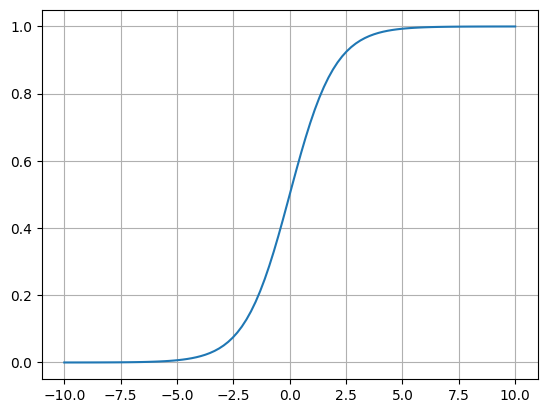

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x,sigmoid(x))
plt.grid(True)
plt.show()

ReLU function

In [ ]:
def relu(x):
  y = np.maximum(0,x)
  return y

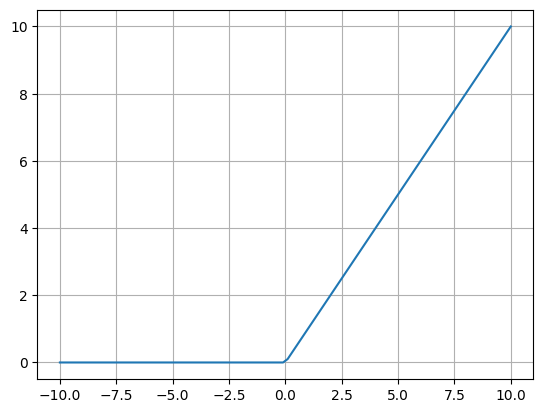

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x,relu(x))
plt.grid(True)
plt.show()

tanh function

In [ ]:
def tanh(x):
  y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
  return y

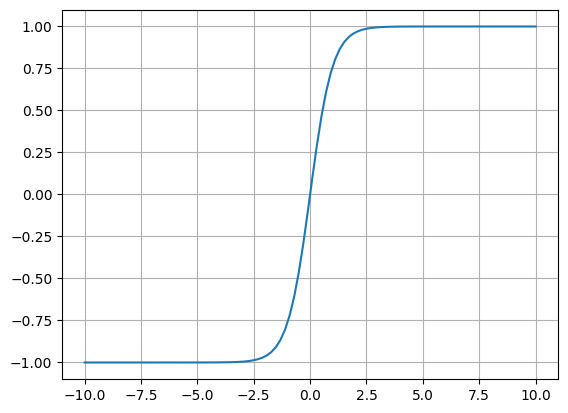

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x,tanh(x))
plt.grid(True)
plt.show()

In binary classification case, we add sigmoid function to the output also to limit it within 0 to 1.

How to add activation function in keras?

In [ ]:
model_activation = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')])

In [ ]:
model_activation.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
